**A CNN architecture to classify the MNIST handwritten dataset**


> In this project, Adam, SGD and RMSprop all 3 optimizers are used and the model is changed different times to gain a higher accuracy.

> Here, every time 25% data kept for validation and 20 epoch is used for every optimizer.

> Same model used for all 3 optimizers for unbiased comparison.






In [16]:
# 1. import
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [17]:
# 2. get data
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


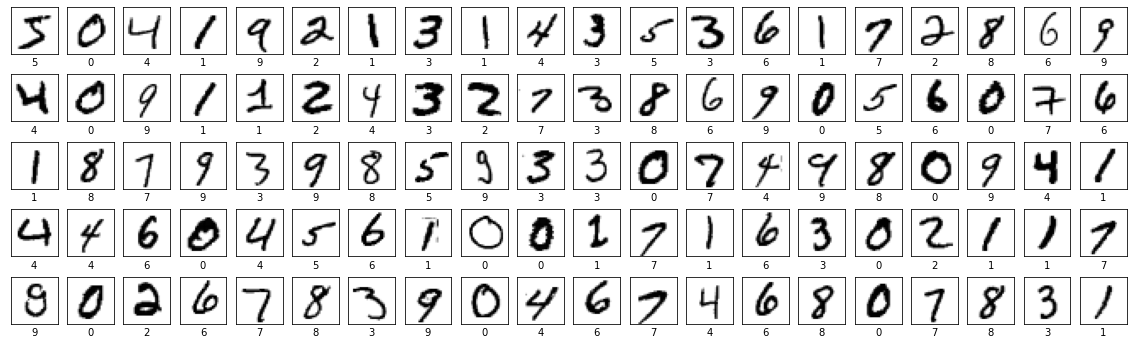

In [18]:
# 3. print data
plt.figure(figsize = (20, 6))
for i in range(100):
  plt.subplot(5, 20, i+1)
  plt.imshow(X_train[i], cmap='gray_r')
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(Y_train[i])
plt.show()

In [19]:
# 4. data preprocessing
X_train, X_test = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255, X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255

In [20]:
# 5. model creation (sequential)
model = tf.keras.Sequential([
	tf.keras.Input(shape=(28, 28, 1)),
	tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),
	tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
	tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu'),
	tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(units=64, activation='relu'),
	tf.keras.layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          12832     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

**1. Using Adam optimizer**

```
# This is formatted as code
```



In [21]:
model.compile(
	optimizer = tf.keras.optimizers.Adam(),
	loss = tf.keras.losses.sparse_categorical_crossentropy,
	metrics = ['accuracy']
)

In [22]:
# 6. training
h = model.fit(x=X_train, y=Y_train, epochs=20, validation_split = 0.3)

Epoch 1/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1965 - accuracy: 0.9403 - val_loss: 0.1075 - val_accuracy: 0.9687
Epoch 2/20
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0621 - accuracy: 0.9814 - val_loss: 0.0588 - val_accuracy: 0.9813
Epoch 3/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0424 - accuracy: 0.9867 - val_loss: 0.0584 - val_accuracy: 0.9827
Epoch 4/20
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0329 - accuracy: 0.9894 - val_loss: 0.0428 - val_accuracy: 0.9874
Epoch 5/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0258 - accuracy: 0.9920 - val_loss: 0.0452 - val_accuracy: 0.9862
Epoch 6/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0215 - accuracy: 0.9931 - val_loss: 0.0482 - val_accuracy: 0.9862
Epoch 7/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0173 - accuracy: 0.9942 - val_loss: 0.0431 - val_accuracy:

In [23]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'\nTest accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0531 - accuracy: 0.9906

Test accuracy: 0.9905999898910522


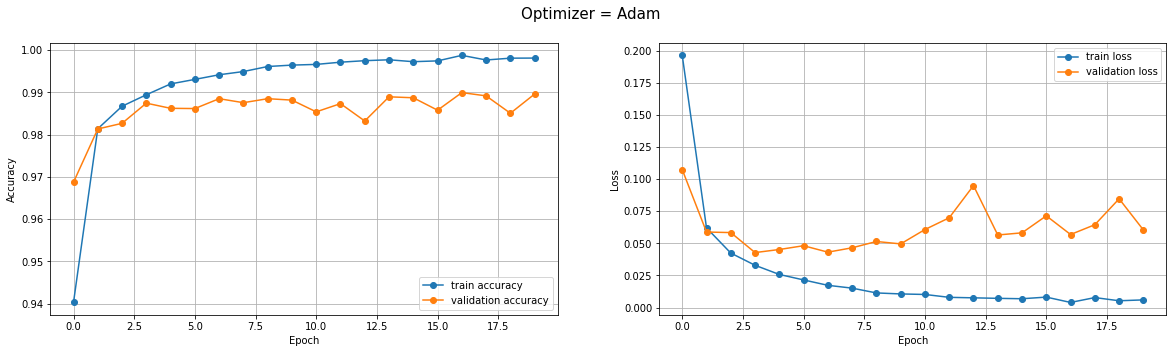

In [24]:
# 7. Plotting the training results
plt.figure(figsize=(20,5))
plt.suptitle('Optimizer = Adam', fontsize = 15)
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label = 'train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label = 'train loss')
plt.plot(h.history['val_loss'], 'o-', label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

**2. Using SGD optimizer**

In [25]:
model.compile(
	optimizer = tf.keras.optimizers.SGD(),
	loss = tf.keras.losses.sparse_categorical_crossentropy,
	metrics = ['accuracy']
)

h = model.fit(x=X_train, y=Y_train, epochs=20, validation_split = 0.3)

Epoch 1/20
1313/1313 [==============================] - 9s 6ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.0594 - val_accuracy: 0.9899
Epoch 2/20
1313/1313 [==============================] - 7s 5ms/step - loss: 5.2956e-04 - accuracy: 0.9998 - val_loss: 0.0601 - val_accuracy: 0.9904
Epoch 3/20
1313/1313 [==============================] - 8s 6ms/step - loss: 3.5236e-04 - accuracy: 1.0000 - val_loss: 0.0601 - val_accuracy: 0.9904
Epoch 4/20
1313/1313 [==============================] - 7s 5ms/step - loss: 2.8500e-04 - accuracy: 1.0000 - val_loss: 0.0604 - val_accuracy: 0.9905
Epoch 5/20
1313/1313 [==============================] - 8s 6ms/step - loss: 2.4066e-04 - accuracy: 1.0000 - val_loss: 0.0607 - val_accuracy: 0.9904
Epoch 6/20
1313/1313 [==============================] - 7s 5ms/step - loss: 2.0952e-04 - accuracy: 1.0000 - val_loss: 0.0609 - val_accuracy: 0.9905
Epoch 7/20
1313/1313 [==============================] - 7s 5ms/step - loss: 1.8698e-04 - accuracy: 1.0000 - val_loss

In [26]:
# 6. training
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'\nTest accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0528 - accuracy: 0.9912

Test accuracy: 0.9911999702453613


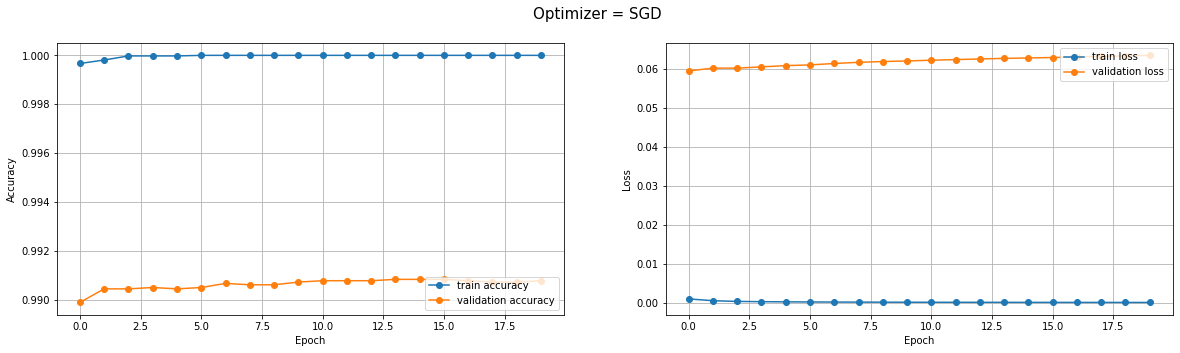

In [27]:
# 7. Plotting the training results
plt.figure(figsize=(20,5))
plt.suptitle('Optimizer = SGD', fontsize = 15)
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label = 'train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label = 'train loss')
plt.plot(h.history['val_loss'], 'o-', label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

**3. Using RMSprop optimizer**

In [28]:
model.compile(
	optimizer = tf.keras.optimizers.RMSprop(),
	loss = tf.keras.losses.sparse_categorical_crossentropy,
	metrics = ['accuracy']
)

h = model.fit(x=X_train, y=Y_train, epochs=20, validation_split = 0.3)

Epoch 1/20
1313/1313 [==============================] - 9s 6ms/step - loss: 7.5398e-04 - accuracy: 0.9997 - val_loss: 0.0877 - val_accuracy: 0.9901
Epoch 2/20
1313/1313 [==============================] - 8s 6ms/step - loss: 5.8002e-04 - accuracy: 0.9998 - val_loss: 0.0947 - val_accuracy: 0.9913
Epoch 3/20
1313/1313 [==============================] - 8s 6ms/step - loss: 2.3142e-04 - accuracy: 1.0000 - val_loss: 0.1014 - val_accuracy: 0.9907
Epoch 4/20
1313/1313 [==============================] - 8s 6ms/step - loss: 3.1138e-04 - accuracy: 0.9999 - val_loss: 0.1039 - val_accuracy: 0.9912
Epoch 5/20
1313/1313 [==============================] - 8s 6ms/step - loss: 8.5086e-05 - accuracy: 1.0000 - val_loss: 0.1092 - val_accuracy: 0.9909
Epoch 6/20
1313/1313 [==============================] - 8s 6ms/step - loss: 1.8367e-04 - accuracy: 1.0000 - val_loss: 0.1189 - val_accuracy: 0.9907
Epoch 7/20
1313/1313 [==============================] - 9s 7ms/step - loss: 6.9770e-06 - accuracy: 1.0000 - val_

In [29]:
# 6. training
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'\nTest accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.1256 - accuracy: 0.9915

Test accuracy: 0.9915000200271606


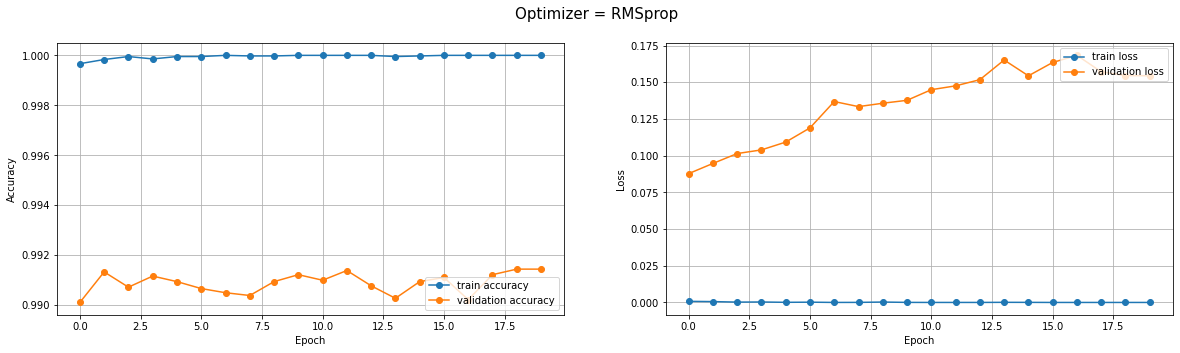

In [30]:
# 7. Plotting the training results
plt.figure(figsize=(20,5))
plt.suptitle('Optimizer = RMSprop', fontsize = 15)
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label = 'train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label = 'train loss')
plt.plot(h.history['val_loss'], 'o-', label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()